# Hypothesis about solvent start temperature

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Search-for-highly-correlated-features-in-X:" data-toc-modified-id="Search-for-highly-correlated-features-in-X:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Search for highly correlated features in X:</a></span></li><li><span><a href="#Repeat-search-for-correlated-features" data-toc-modified-id="Repeat-search-for-correlated-features-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Repeat search for correlated features</a></span><ul class="toc-item"><li><span><a href="#Heatmaps-again" data-toc-modified-id="Heatmaps-again-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Heatmaps again</a></span></li></ul></li><li><span><a href="#Finding-a-(linear)-model" data-toc-modified-id="Finding-a-(linear)-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Finding a (linear) model</a></span><ul class="toc-item"><li><span><a href="#seaborn" data-toc-modified-id="seaborn-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>seaborn</a></span></li></ul></li><li><span><a href="#pandas_profiling" data-toc-modified-id="pandas_profiling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>pandas_profiling</a></span></li></ul></div>

In [54]:
# Import necessary packages
import pandas as pd
pd.options.display.max_columns = None

In [199]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os

In [67]:
import numpy as np

Import saved DataFrame usind pandas method read_pickle (since it is faster than reading a .csv file):

In [55]:
df = pd.read_pickle('./Data/process_data_df10.pkl')

Remove rows where `qc_salzrckhalt == 0` or `qc_durchfluss == 0`.

In [56]:
mask = (df.qc[['qc_salzrckhalt','qc_durchfluss']] > 0).all(axis=1)
df = df.loc[mask,:]

df.shape

(117559, 343)

Select only features from the `pa` process step:

In [57]:
df_pa = df['pa']

In [58]:
# df_pa.head()

In [59]:
def num_cols(df):
    ''' Shows enumerated dictionary of column 
        names of a pandas DataFrame '''
    
    d = {df.columns.get_loc(c):c for c in df.columns}

    return d

Create a enumerated dictionary with column names from `pa` process step:

In [60]:
dict_pa = num_cols(df_pa)
dict_pa

{0: 'pa_datum',
 1: 'pa_beschichtete_rollenlange_m',
 2: 'pa_bahn-geschwindigkeit_m/min',
 3: 'pa_bad-wechsel_m-pda',
 4: 'pa_bad-wechsel_hw1',
 5: 'pa_bad-wechsel_hw2',
 6: 'pa_bad-wechsel_chlor',
 7: 'pa_bad-wechsel_hw3',
 8: 'pa_raum_temperatur_start_c',
 9: 'pa_temperatur_m-pda-bad_c',
 10: 'pa_cm-pda_0m',
 11: 'pa_cm-pda_500m',
 12: 'pa_cm-pda_1000m',
 13: 'pa_cm-pda_1500m',
 14: 'pa_cm-pda_2000m',
 15: 'pa_cm-pda_2500m',
 16: 'pa_cm-pda_3000m',
 17: 'pa_cm-pda_3500m',
 18: 'pa_cm-pda_4000m',
 19: 'pa_ce-capro_lactam_%',
 20: 'pa_temperatur_n-decan-lsg_chem_vorbereitung_start_c',
 21: 'pa_ctmc_richtwert_%',
 22: 'pa_ctmc_%',
 23: 'pa_temperatur_alkali-lsg_chem_vorbereitung_start_c',
 24: 'pa_temperatur_chlorbad_start_c',
 25: 'pa_chlorkonzentration_0m_ppm',
 26: 'pa_chlorkonzentration_500m_ppm',
 27: 'pa_chlorkonzentration_1000m_ppm',
 28: 'pa_chlorkonzentration_1500m_ppm',
 29: 'pa_chlorkonzentration_2000m_ppm',
 30: 'pa_chlorkonzentration_2500m_ppm',
 31: 'pa_chlorkonzentration_

Select only features related to temperature and humidity:

In [61]:
dict_pa_sub = {k:v for k,v in dict_pa.items() if ('temp' in v) or ('feucht' in v) or (v.startswith('f_'))}

print("{} features selected:".format(len(dict_pa_sub)))
dict_pa_sub

46 features selected:


{8: 'pa_raum_temperatur_start_c',
 9: 'pa_temperatur_m-pda-bad_c',
 20: 'pa_temperatur_n-decan-lsg_chem_vorbereitung_start_c',
 23: 'pa_temperatur_alkali-lsg_chem_vorbereitung_start_c',
 24: 'pa_temperatur_chlorbad_start_c',
 50: 'pa_raum_feuchte_start_%',
 51: 'pa_amin-trockner_temperatur_danfugt_c',
 52: 'pa_amin-trockner_feuchtigkeit_danfugt_bs_0m_%',
 53: 'pa_amin-trockner_feuchtigkeit_danfugt_bs_1000m_%',
 54: 'pa_amin-trockner_feuchtigkeit_danfugt_bs_2000m_%',
 55: 'pa_amin-trockner_feuchtigkeit_danfugt_bs_3000m_%',
 56: 'pa_amin-trockner_feuchtigkeit_danfugt_bs_4000m_%',
 57: 'pa_amin-trockner_feuchtigkeit_danfugt_as_0m',
 58: 'pa_amin-trockner_feuchtigkeit_danfugt_as_1000m',
 59: 'pa_amin-trockner_feuchtigkeit_danfugt_as_2000m',
 60: 'pa_amin-trockner_feuchtigkeit_danfugt_as_3000m',
 61: 'pa_amin-trockner_feuchtigkeit_danfugt_as_4000m',
 62: 'pa_amin-trockner_temperatur_cofely_c',
 63: 'pa_amin-trockner_feuchtigkeit_cofely_0m_%',
 64: 'pa_amin-trockner_feuchtigkeit_cofely_600m_

Save the selected columns in the variable X:

In [62]:
X = df.pa.iloc[:,list(dict_pa_sub)]
X.sample(5)

,pa_raum_temperatur_start_c,pa_temperatur_m-pda-bad_c,pa_temperatur_n-decan-lsg_chem_vorbereitung_start_c,pa_temperatur_alkali-lsg_chem_vorbereitung_start_c,pa_temperatur_chlorbad_start_c,pa_raum_feuchte_start_%,pa_amin-trockner_temperatur_danfugt_c,pa_amin-trockner_feuchtigkeit_danfugt_bs_0m_%,pa_amin-trockner_feuchtigkeit_danfugt_bs_1000m_%,pa_amin-trockner_feuchtigkeit_danfugt_bs_2000m_%,pa_amin-trockner_feuchtigkeit_danfugt_bs_3000m_%,pa_amin-trockner_feuchtigkeit_danfugt_bs_4000m_%,pa_amin-trockner_feuchtigkeit_danfugt_as_0m,pa_amin-trockner_feuchtigkeit_danfugt_as_1000m,pa_amin-trockner_feuchtigkeit_danfugt_as_2000m,pa_amin-trockner_feuchtigkeit_danfugt_as_3000m,pa_amin-trockner_feuchtigkeit_danfugt_as_4000m,pa_amin-trockner_temperatur_cofely_c,pa_amin-trockner_feuchtigkeit_cofely_0m_%,pa_amin-trockner_feuchtigkeit_cofely_600m_%,pa_amin-trockner_feuchtigkeit_cofely_1200m_%,pa_amin-trockner_feuchtigkeit_cofely_1800m_%,pa_amin-trockner_feuchtigkeit_cofely_2400m_%,pa_amin-trockner_feuchtigkeit_cofely_3000m_%,pa_amin-trockner_feuchtigkeit_cofely_3600m_%,pa_amin-trockner_feuchtigkeit_cofely_4200m_%,pa_vertikale_feuchte_oben_start_%,pa_vertikale_feuchte_oben_mitte_%,pa_vertikale_feuchte_oben_ende_%,pa_temperatur_n-decan-lsg_chem_vorbereitung_start_ref_low_c,pa_temperatur_n-decan-lsg_chem_vorbereitung_start_ref_high_c,pa_temperatur_alkali-lsg_chem_vorbereitung_start_ref_low_c,pa_temperatur_alkali-lsg_chem_vorbereitung_start_ref_high_c,pa_amin-trockner_temperatur_danfugt_ref_c,pa_amin-trockner_feuchtigkeit_danfugt_bs_ref_low_%,pa_amin-trockner_feuchtigkeit_danfugt_bs_ref_high_%,pa_amin-trockner_feuchtigkeit_danfugt_as_ref_low,pa_amin-trockner_feuchtigkeit_danfugt_as_ref_high,pa_amin-trockner_feuchtigkeit_cofely_ref_low_%,pa_amin-trockner_feuchtigkeit_cofely_ref_high_%,pa_vertikale_feuchte_oben_ref_low_%,pa_vertikale_feuchte_oben_ref_high_%,f_danfugt_bs_median,f_danfugt_as_median,f_codfely_median,temp_median
74523,22.6,20.0,30.00,23.00,20.0,32.4,35.0,59.0,60.0,61.0,60.0,60.0,59.0,61.0,60.0,60.0,61.0,25.0,82.8,82.4,82.9,85.5,84.2,83.0,83.1,82.0,42.0,48.0,48.0,24.0,28.0,21.0,22.5,35.0,57.0,60.0,57.0,60.0,77.0,80.0,30.0,50.0,60.0,60.0,82.95,22.2
92248,22.0,20.0,24.40,21.40,20.0,23.0,35.0,53.0,61.0,60.0,60.0,60.0,54.0,61.0,59.0,59.0,60.0,25.0,81.1,82.6,82.3,81.9,82.0,82.2,83.0,81.3,20.0,36.0,35.0,24.0,28.0,21.0,22.5,35.0,57.0,60.0,57.0,60.0,77.0,80.0,30.0,50.0,60.0,59.0,82.10,19.5
7695,23.0,18.0,23.71,23.76,20.0,24.0,30.0,64.0,64.0,64.0,63.0,64.0,7.0,61.0,61.0,61.0,61.0,25.0,83.0,83.0,83.0,83.0,83.0,82.5,83.0,82.6,35.0,34.0,37.0,24.0,28.0,21.0,22.5,30.0,57.0,58.0,57.0,58.0,79.0,81.0,40.0,42.0,64.0,61.0,83.00,20.9
30916,23.0,19.0,26.40,23.20,20.0,38.0,35.0,53.0,61.0,60.0,60.0,61.0,55.0,61.0,60.0,61.0,60.0,25.0,82.7,83.5,82.9,83.2,83.8,82.8,83.0,83.4,42.0,45.0,49.0,24.0,28.0,21.0,22.5,35.0,57.0,60.0,57.0,60.0,77.0,80.0,30.0,50.0,60.0,60.0,83.10,22.6
41852,25.0,18.0,25.00,23.00,20.0,30.0,30.0,62.0,62.0,63.0,65.0,66.0,61.0,60.0,61.0,61.0,63.0,25.0,75.0,76.8,74.7,75.1,74.6,75.3,75.2,76.8,45.0,41.0,37.0,24.0,28.0,21.0,22.5,30.0,57.0,58.0,57.0,58.0,79.0,81.0,40.0,42.0,63.0,61.0,75.15,21.6


In [63]:
y = df.qc[['qc_salzrckhalt']]
y.sample(5)

,qc_salzrckhalt
21544,99.603851
27001,99.560691
9682,99.812936
66578,99.708236
65696,99.559784


### Search for highly correlated features in X:

Rearch and remove highly correlated feature in X, since they will influence badly our model.
First, let us replace all the 0's in X fo NaN, since they don't seem to make sense:

In [64]:
X.replace(0,float('nan'),inplace=True)

In [66]:
# Creates folder "./Figures/" and display a message
if not os.path.isdir('./Figures'):
    %mkdir "Figures"
    if os.path.isdir('./Figures'):
        print('Folder created')


Heatmaps were created with:

    plt.figure(figsize=(40, 30))
    p = sns.heatmap(X.corr(method='pearson'),annot=True,linewidth=.5)
    plt.savefig('./Figures/pa_heatmap_pearson.pdf')

    plt.figure(figsize=(40, 30))
    p = sns.heatmap(X.corr(method='spearman'),annot=True,linewidth=.5)
    plt.savefig('./Figures/pa_heatmap_spearman.pdf')

In [68]:
def get_high_corr(df,method="pearson",threshold=0.95):
    '''Returns highly correlated features in a DataFrame
       based on a threshold value'''
    # Create correlation matrix
    corr_matrix = df.corr(method).abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find index of feature columns with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    return to_drop

```python
## Gets features with high pearson and spearman correlation coefficients
## Loads from an existing file or (if file doesn't exist) calculate values and write file.

# filename

p90 = get_high_corr(X,method='pearson',threshold=.90)
s90 = get_high_corr(X,method='spearman',threshold=.90)

# outfile = open(filename,'wb')
# pickle.dump({'p90':p90,'s90':s90},outfile)
# outfile.close()
```

    p95 = get_high_corr(X,method='pearson',threshold=.95)
    s95 = get_high_corr(X,method='spearman',threshold=.95)

In [69]:
# Python script where p90 and s90 are "saved"
%run -i correlated_vars.py

In [70]:
p90

['pa_amin-trockner_feuchtigkeit_danfugt_as_2000m',
 'pa_amin-trockner_feuchtigkeit_danfugt_as_3000m',
 'pa_amin-trockner_feuchtigkeit_danfugt_as_4000m',
 'pa_vertikale_feuchte_oben_ende_%',
 'pa_temperatur_n-decan-lsg_chem_vorbereitung_start_ref_high_c',
 'pa_amin-trockner_feuchtigkeit_danfugt_bs_ref_high_%',
 'pa_amin-trockner_feuchtigkeit_danfugt_as_ref_low',
 'pa_amin-trockner_feuchtigkeit_danfugt_as_ref_high',
 'pa_amin-trockner_feuchtigkeit_cofely_ref_low_%',
 'pa_amin-trockner_feuchtigkeit_cofely_ref_high_%',
 'pa_vertikale_feuchte_oben_ref_high_%',
 'f_danfugt_as_median']

In [71]:
s90

['pa_amin-trockner_feuchtigkeit_danfugt_bs_2000m_%',
 'pa_amin-trockner_feuchtigkeit_danfugt_bs_3000m_%',
 'pa_amin-trockner_feuchtigkeit_danfugt_bs_4000m_%',
 'pa_amin-trockner_feuchtigkeit_danfugt_as_2000m',
 'pa_amin-trockner_feuchtigkeit_danfugt_as_3000m',
 'pa_amin-trockner_feuchtigkeit_danfugt_as_4000m',
 'pa_vertikale_feuchte_oben_mitte_%',
 'pa_vertikale_feuchte_oben_ende_%',
 'pa_temperatur_n-decan-lsg_chem_vorbereitung_start_ref_high_c',
 'pa_amin-trockner_temperatur_danfugt_ref_c',
 'pa_amin-trockner_feuchtigkeit_danfugt_as_ref_low',
 'pa_amin-trockner_feuchtigkeit_danfugt_as_ref_high',
 'pa_amin-trockner_feuchtigkeit_cofely_ref_low_%',
 'pa_amin-trockner_feuchtigkeit_cofely_ref_high_%',
 'pa_vertikale_feuchte_oben_ref_high_%',
 'f_danfugt_bs_median',
 'f_danfugt_as_median',
 'f_codfely_median']

In [72]:
s90.remove('pa_temperatur_n-decan-lsg_chem_vorbereitung_start_ref_high_c')

In [73]:
s90

['pa_amin-trockner_feuchtigkeit_danfugt_bs_2000m_%',
 'pa_amin-trockner_feuchtigkeit_danfugt_bs_3000m_%',
 'pa_amin-trockner_feuchtigkeit_danfugt_bs_4000m_%',
 'pa_amin-trockner_feuchtigkeit_danfugt_as_2000m',
 'pa_amin-trockner_feuchtigkeit_danfugt_as_3000m',
 'pa_amin-trockner_feuchtigkeit_danfugt_as_4000m',
 'pa_vertikale_feuchte_oben_mitte_%',
 'pa_vertikale_feuchte_oben_ende_%',
 'pa_amin-trockner_temperatur_danfugt_ref_c',
 'pa_amin-trockner_feuchtigkeit_danfugt_as_ref_low',
 'pa_amin-trockner_feuchtigkeit_danfugt_as_ref_high',
 'pa_amin-trockner_feuchtigkeit_cofely_ref_low_%',
 'pa_amin-trockner_feuchtigkeit_cofely_ref_high_%',
 'pa_vertikale_feuchte_oben_ref_high_%',
 'f_danfugt_bs_median',
 'f_danfugt_as_median',
 'f_codfely_median']

In [74]:
X2 = X.drop(columns=s90)

In [75]:
X2.describe()

,pa_raum_temperatur_start_c,pa_temperatur_m-pda-bad_c,pa_temperatur_n-decan-lsg_chem_vorbereitung_start_c,pa_temperatur_alkali-lsg_chem_vorbereitung_start_c,pa_temperatur_chlorbad_start_c,pa_raum_feuchte_start_%,pa_amin-trockner_temperatur_danfugt_c,pa_amin-trockner_feuchtigkeit_danfugt_bs_0m_%,pa_amin-trockner_feuchtigkeit_danfugt_bs_1000m_%,pa_amin-trockner_feuchtigkeit_danfugt_as_0m,pa_amin-trockner_feuchtigkeit_danfugt_as_1000m,pa_amin-trockner_temperatur_cofely_c,pa_amin-trockner_feuchtigkeit_cofely_0m_%,pa_amin-trockner_feuchtigkeit_cofely_600m_%,pa_amin-trockner_feuchtigkeit_cofely_1200m_%,pa_amin-trockner_feuchtigkeit_cofely_1800m_%,pa_amin-trockner_feuchtigkeit_cofely_2400m_%,pa_amin-trockner_feuchtigkeit_cofely_3000m_%,pa_amin-trockner_feuchtigkeit_cofely_3600m_%,pa_amin-trockner_feuchtigkeit_cofely_4200m_%,pa_vertikale_feuchte_oben_start_%,pa_temperatur_n-decan-lsg_chem_vorbereitung_start_ref_low_c,pa_temperatur_n-decan-lsg_chem_vorbereitung_start_ref_high_c,pa_temperatur_alkali-lsg_chem_vorbereitung_start_ref_low_c,pa_temperatur_alkali-lsg_chem_vorbereitung_start_ref_high_c,pa_amin-trockner_feuchtigkeit_danfugt_bs_ref_low_%,pa_amin-trockner_feuchtigkeit_danfugt_bs_ref_high_%,pa_vertikale_feuchte_oben_ref_low_%,temp_median
count,116692.000000,117151.000000,116535.000000,114129.000000,117151.000000,116602.000000,116934.000000,116746.000000,117063.000000,116746.000000,117063.000000,116301.000000,117215.000000,117099.000000,117049.000000,116696.000000,115085.000000,114496.000000,114106.000000,112369.000000,117165.000000,117081.000000,117081.000000,117081.0,117081.000000,117559.000000,117559.000000,117559.000000,117235.000000
mean,23.926255,19.200664,27.389272,23.001624,20.134775,31.875142,33.284588,59.336715,58.644823,57.319435,56.840394,27.021695,76.985111,76.924623,76.978775,83.624296,76.988609,77.054047,78.117391,77.045941,40.616549,23.720091,27.396606,21.0,22.478212,56.814740,59.517417,33.472682,21.950075
std,1.181166,5.028491,2.235485,0.733455,0.430151,11.013958,3.011694,8.812938,12.291398,17.502484,4.837487,70.294937,21.263701,20.428956,22.345168,234.394333,21.463980,24.688016,37.946631,23.861520,51.516428,0.661737,1.385200,0.0,0.102076,2.500461,2.163595,4.648474,0.769706
min,19.000000,13.000000,16.000000,18.000000,17.000000,18.000000,25.000000,25.000000,44.000000,7.000000,45.000000,20.000000,7.400000,20.000000,7.580000,7.520000,20.000000,9.000000,7.200000,19.900000,15.000000,22.000000,24.000000,21.0,22.000000,50.000000,55.000000,30.000000,17.900000
25%,23.000000,18.000000,26.400000,22.700000,20.000000,24.000000,30.000000,53.000000,55.000000,51.000000,53.000000,25.000000,74.800000,74.800000,74.800000,74.900000,74.800000,74.800000,74.800000,74.800000,35.000000,24.000000,28.000000,21.0,22.500000,57.000000,58.000000,30.000000,21.500000
50%,24.000000,19.000000,27.800000,23.000000,20.000000,28.000000,35.000000,59.000000,59.000000,58.000000,58.000000,25.000000,76.000000,76.100000,76.000000,75.900000,76.000000,76.000000,76.000000,76.200000,39.000000,24.000000,28.000000,21.0,22.500000,57.000000,60.000000,30.000000,22.000000
75%,25.000000,20.000000,29.000000,23.330000,20.000000,38.000000,35.000000,64.000000,61.000000,61.000000,60.000000,25.000000,82.400000,82.200000,82.300000,82.200000,82.300000,82.300000,82.400000,82.300000,44.000000,24.000000,28.000000,21.0,22.500000,57.000000,60.000000,39.000000,22.400000
max,40.000000,203.000000,32.000000,29.060000,22.400000,223.000000,65.000000,91.000000,450.000000,603.000000,73.000000,2525.000000,737.000000,756.900000,792.000000,8301.000000,784.900000,836.000000,883.300000,831.000000,4346.000000,24.000000,28.000000,21.0,22.500000,65.000000,67.000000,40.000000,26.000000


And Data Cleaning continues...
We spotted some columns which have unreasonable values.

Following strategy can be used to see one plot after the other (using a iterator):

```python
kk = iter((num_cols(X2).items()))
```

```python
# next(kk)
```    

```python
idkk, textkk = next(kk)

print(idkk)
print(textkk)

X2.iloc[:,[idkk]].plot(kind='line',style='o')
plt.title('({}) {}'.format(idkk,textkk))
plt.legend("")
plt.show()
```

```python
dict_X2 = num_cols(X2)
dict_X2
```

After analysing graphically each feature, we created the following dictionary defining the course of action to be taken

In [77]:
dict_clean={
    'pa_raum_temperatur_start_c':                                 30 ,
    'pa_temperatur_m-pda-bad_c':                                  50 ,
    'pa_raum_feuchte_start_%':                                    100,
    'pa_amin-trockner_feuchtigkeit_danfugt_bs_1000m_%':           100,
    'pa_amin-trockner_feuchtigkeit_danfugt_as_0m':                100,
    'pa_amin-trockner_temperatur_cofely_c':                       100,
    'pa_amin-trockner_feuchtigkeit_cofely_0m_%':                  100,
    'pa_amin-trockner_feuchtigkeit_cofely_600m_%':                100,
    'pa_amin-trockner_feuchtigkeit_cofely_1200m_%':               100,
    'pa_amin-trockner_feuchtigkeit_cofely_1800m_%':               100,
    'pa_amin-trockner_feuchtigkeit_cofely_2400m_%':               100,
    'pa_amin-trockner_feuchtigkeit_cofely_3000m_%':               100,
    'pa_amin-trockner_feuchtigkeit_cofely_3600m_%':               100,
    'pa_amin-trockner_feuchtigkeit_cofely_4200m_%':               100,
    'pa_vertikale_feuchte_oben_start_%':                          100,
    'pa_temperatur_alkali-lsg_chem_vorbereitung_start_ref_low_c': "drop",
    'pa_temperatur_alkali-lsg_chem_vorbereitung_start_ref_high_c':"drop"
};

Remove values above the threshold defined in the `dict_clean` and drops the respective columns:

In [78]:
for k,v in dict_clean.items():
    if type(v) is int:
        mask = X[k]>v
        # substitute outliers for NaN
        X2.loc[mask,:] = float('nan')
        
    elif v=="drop":
        X2.drop(columns=k,inplace=True)        

Let us have a quick glimpse into X2:

In [79]:
X2.describe()

,pa_raum_temperatur_start_c,pa_temperatur_m-pda-bad_c,pa_temperatur_n-decan-lsg_chem_vorbereitung_start_c,pa_temperatur_alkali-lsg_chem_vorbereitung_start_c,pa_temperatur_chlorbad_start_c,pa_raum_feuchte_start_%,pa_amin-trockner_temperatur_danfugt_c,pa_amin-trockner_feuchtigkeit_danfugt_bs_0m_%,pa_amin-trockner_feuchtigkeit_danfugt_bs_1000m_%,pa_amin-trockner_feuchtigkeit_danfugt_as_0m,pa_amin-trockner_feuchtigkeit_danfugt_as_1000m,pa_amin-trockner_temperatur_cofely_c,pa_amin-trockner_feuchtigkeit_cofely_0m_%,pa_amin-trockner_feuchtigkeit_cofely_600m_%,pa_amin-trockner_feuchtigkeit_cofely_1200m_%,pa_amin-trockner_feuchtigkeit_cofely_1800m_%,pa_amin-trockner_feuchtigkeit_cofely_2400m_%,pa_amin-trockner_feuchtigkeit_cofely_3000m_%,pa_amin-trockner_feuchtigkeit_cofely_3600m_%,pa_amin-trockner_feuchtigkeit_cofely_4200m_%,pa_vertikale_feuchte_oben_start_%,pa_temperatur_n-decan-lsg_chem_vorbereitung_start_ref_low_c,pa_temperatur_n-decan-lsg_chem_vorbereitung_start_ref_high_c,pa_amin-trockner_feuchtigkeit_danfugt_bs_ref_low_%,pa_amin-trockner_feuchtigkeit_danfugt_bs_ref_high_%,pa_vertikale_feuchte_oben_ref_low_%,temp_median
count,114854.000000,115313.000000,114791.000000,112480.000000,115313.000000,114764.000000,115096.000000,114908.000000,115225.000000,114908.000000,115225.000000,114463.000000,115377.000000,115261.000000,115211.000000,114858.000000,113247.000000,112658.000000,112268.000000,110531.000000,115327.000000,115243.000000,115243.000000,115721.000000,115721.000000,115721.000000,115397.000000
mean,23.916037,19.074233,27.386475,23.001336,20.135241,31.726798,33.288081,59.357174,58.323644,56.894662,56.835366,24.729590,76.409832,76.429342,76.364950,76.388838,76.420435,76.341142,76.283528,76.378100,39.479974,23.719679,27.395807,56.828709,59.524512,33.468402,21.950775
std,1.090846,1.581524,2.241238,0.736078,0.431811,9.578940,3.013904,8.823868,5.311509,8.149848,4.836357,5.187193,9.808239,9.503969,9.690661,9.626725,9.561492,9.855188,10.063117,9.730946,6.326966,0.662204,1.386032,2.482466,2.155530,4.646863,0.770629
min,19.000000,13.000000,16.000000,18.000000,17.000000,18.000000,25.000000,25.000000,44.000000,7.000000,45.000000,20.000000,7.400000,20.000000,7.580000,7.520000,20.000000,9.000000,7.200000,19.900000,15.000000,22.000000,24.000000,50.000000,55.000000,30.000000,17.900000
25%,23.000000,18.000000,26.400000,22.700000,20.000000,24.000000,30.000000,53.000000,55.000000,51.000000,53.000000,25.000000,74.800000,74.800000,74.800000,74.900000,74.800000,74.800000,74.800000,74.800000,35.000000,24.000000,28.000000,57.000000,58.000000,30.000000,21.500000
50%,24.000000,19.000000,27.790000,23.000000,20.000000,28.000000,35.000000,59.000000,59.000000,58.000000,58.000000,25.000000,76.000000,76.100000,76.000000,75.900000,76.000000,76.000000,76.000000,76.100000,39.000000,24.000000,28.000000,57.000000,60.000000,30.000000,22.000000
75%,25.000000,20.000000,29.000000,23.330000,20.000000,38.000000,35.000000,64.000000,61.000000,61.000000,60.000000,25.000000,82.300000,82.200000,82.300000,82.200000,82.200000,82.300000,82.400000,82.300000,44.000000,24.000000,28.000000,57.000000,60.000000,39.000000,22.400000
max,27.000000,25.000000,32.000000,29.060000,22.400000,83.500000,65.000000,91.000000,79.000000,81.000000,73.000000,83.000000,91.900000,86.100000,86.500000,87.700000,93.300000,87.400000,93.200000,86.200000,58.000000,24.000000,28.000000,65.000000,67.000000,40.000000,26.000000


Looks clean 😎

### Repeat search for correlated features

In [81]:
p2_90 = get_high_corr(X2,method='pearson',threshold=.90)
s2_90 = get_high_corr(X2,method='spearman',threshold=.90)

In [83]:
p2_90

['pa_amin-trockner_feuchtigkeit_cofely_600m_%',
 'pa_amin-trockner_feuchtigkeit_cofely_1200m_%',
 'pa_amin-trockner_feuchtigkeit_cofely_1800m_%',
 'pa_amin-trockner_feuchtigkeit_cofely_2400m_%',
 'pa_amin-trockner_feuchtigkeit_cofely_3000m_%',
 'pa_amin-trockner_feuchtigkeit_cofely_3600m_%',
 'pa_amin-trockner_feuchtigkeit_cofely_4200m_%',
 'pa_temperatur_n-decan-lsg_chem_vorbereitung_start_ref_high_c',
 'pa_amin-trockner_feuchtigkeit_danfugt_bs_ref_high_%']

In [84]:
s2_90

['pa_amin-trockner_feuchtigkeit_danfugt_as_1000m',
 'pa_temperatur_n-decan-lsg_chem_vorbereitung_start_ref_high_c']

In [97]:
p2_90.remove('pa_temperatur_n-decan-lsg_chem_vorbereitung_start_ref_high_c')

ValueError: list.remove(x): x not in list

#### Heatmaps again

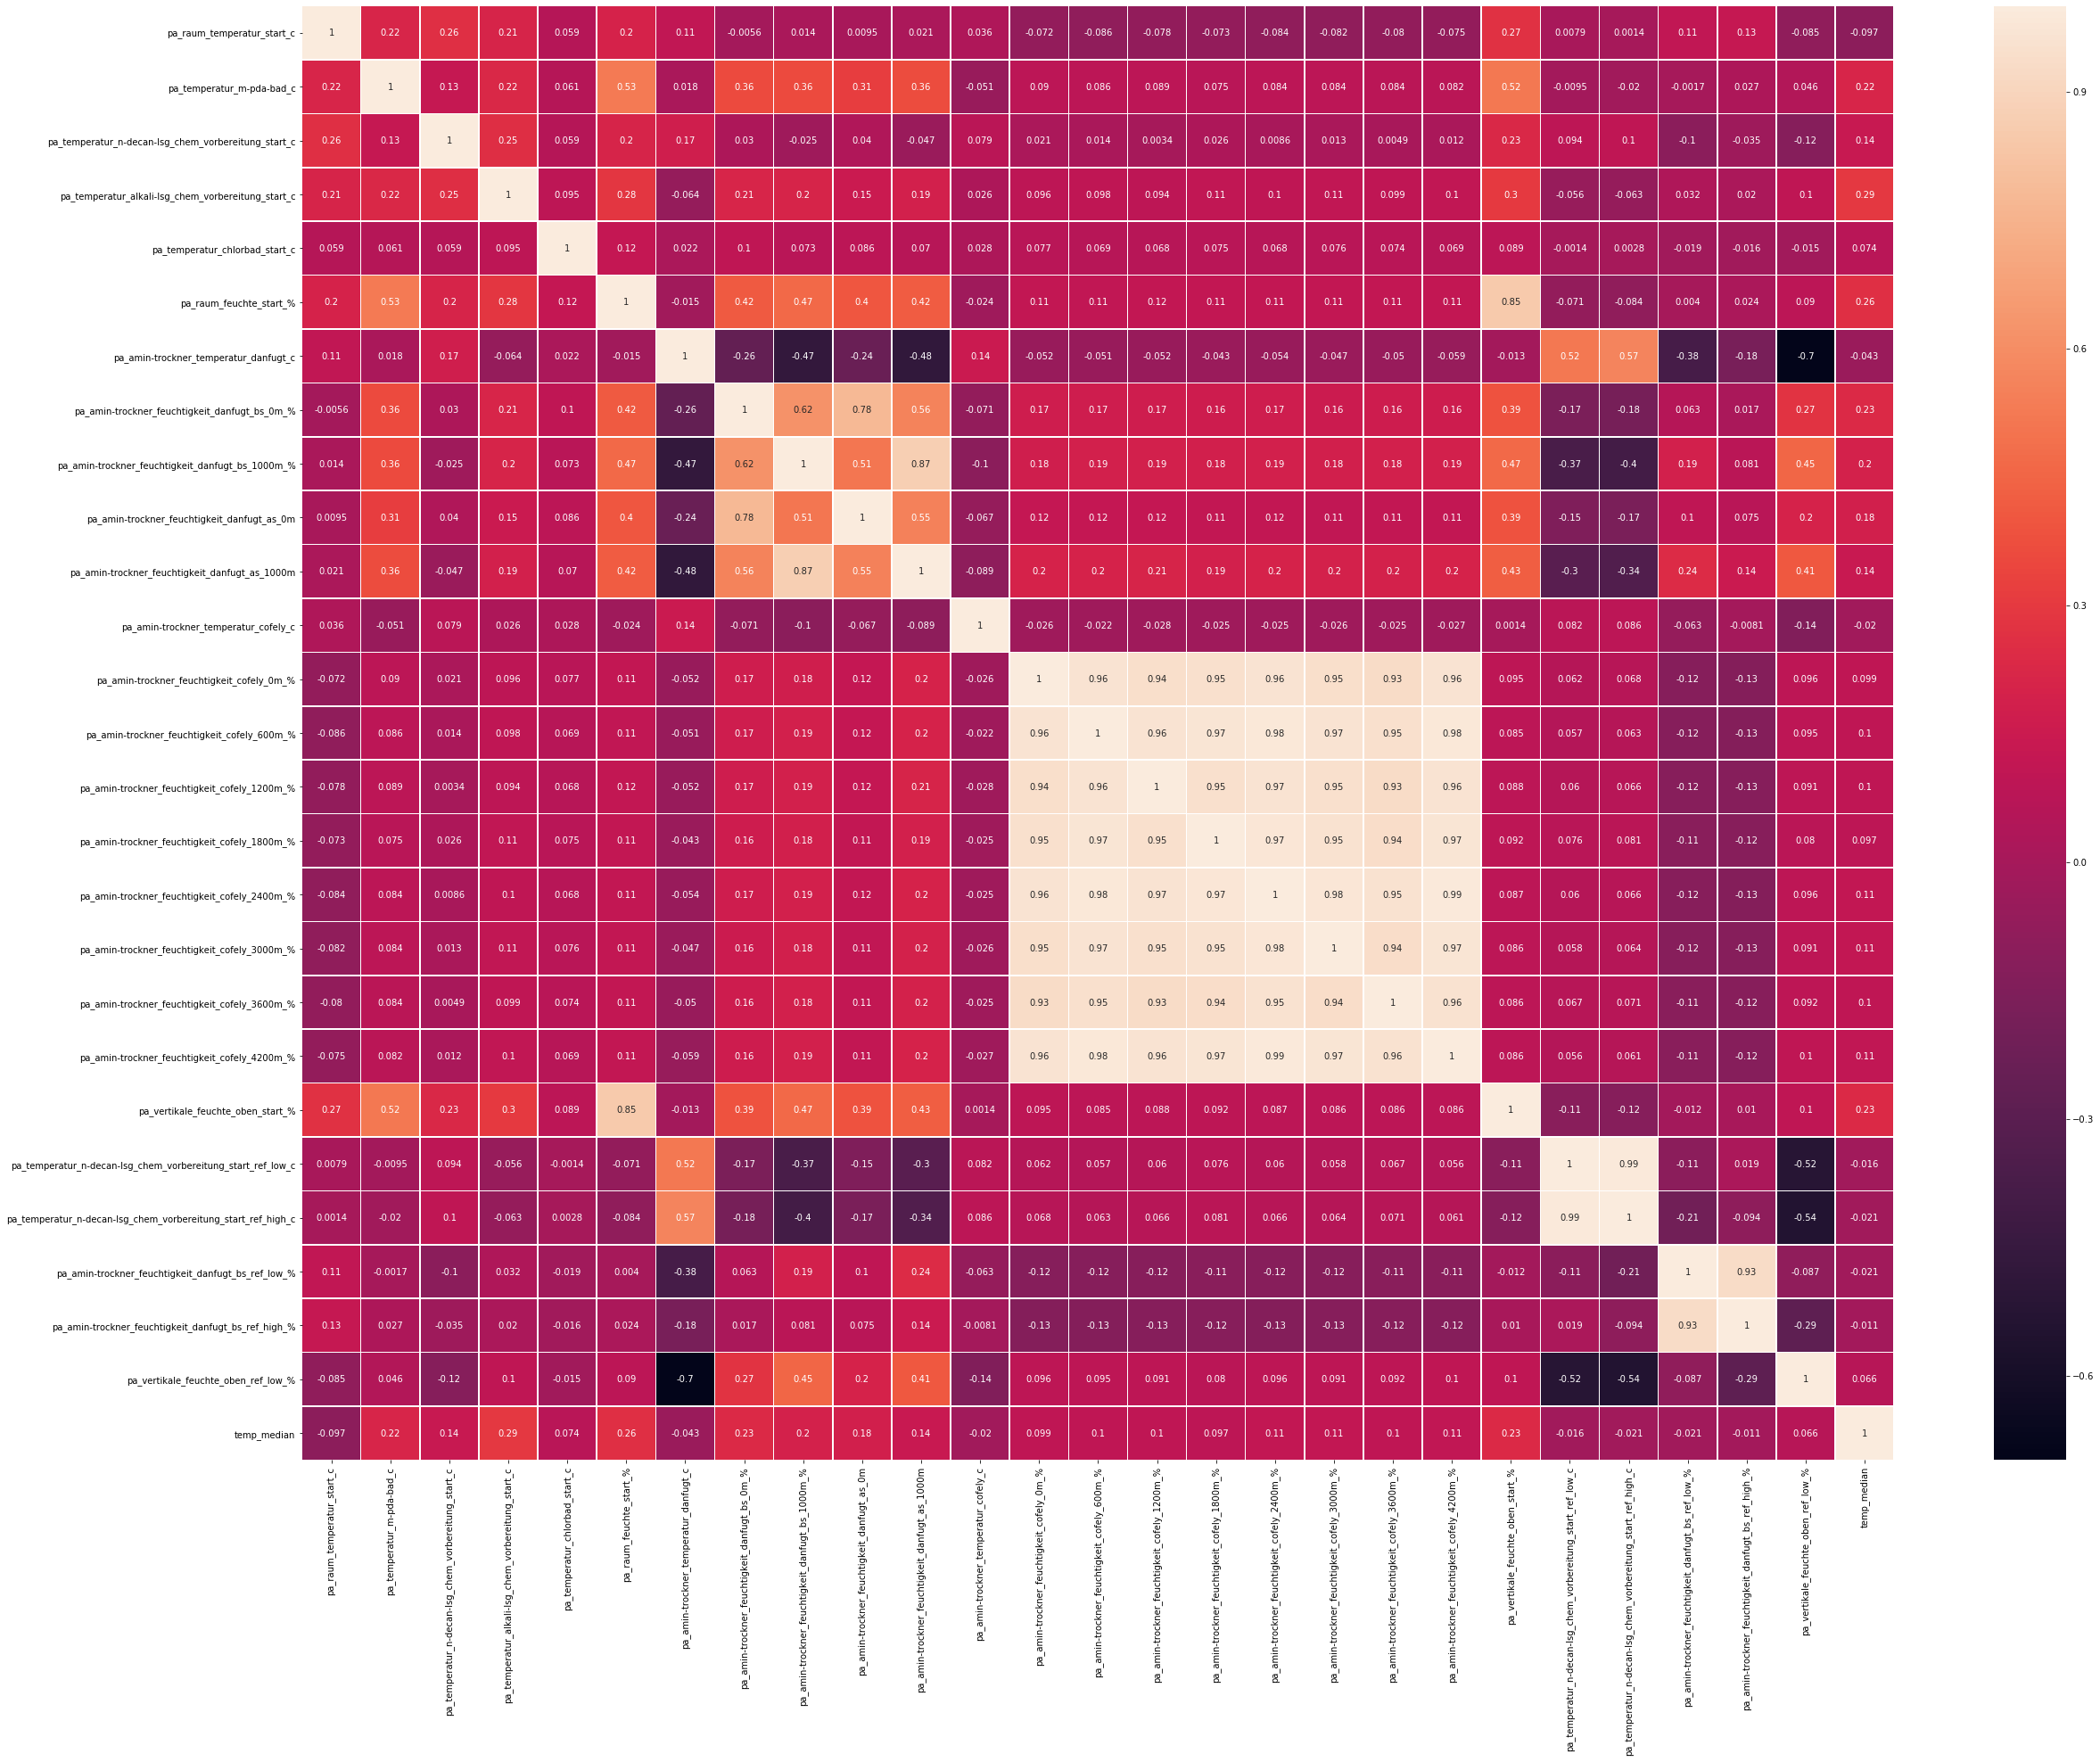

In [87]:
plt.figure(figsize=(40, 30))
p = sns.heatmap(X2.corr(method='pearson'),annot=True,linewidth=.5)
plt.savefig('./Figures/X2_heatmap_pearson.pdf')

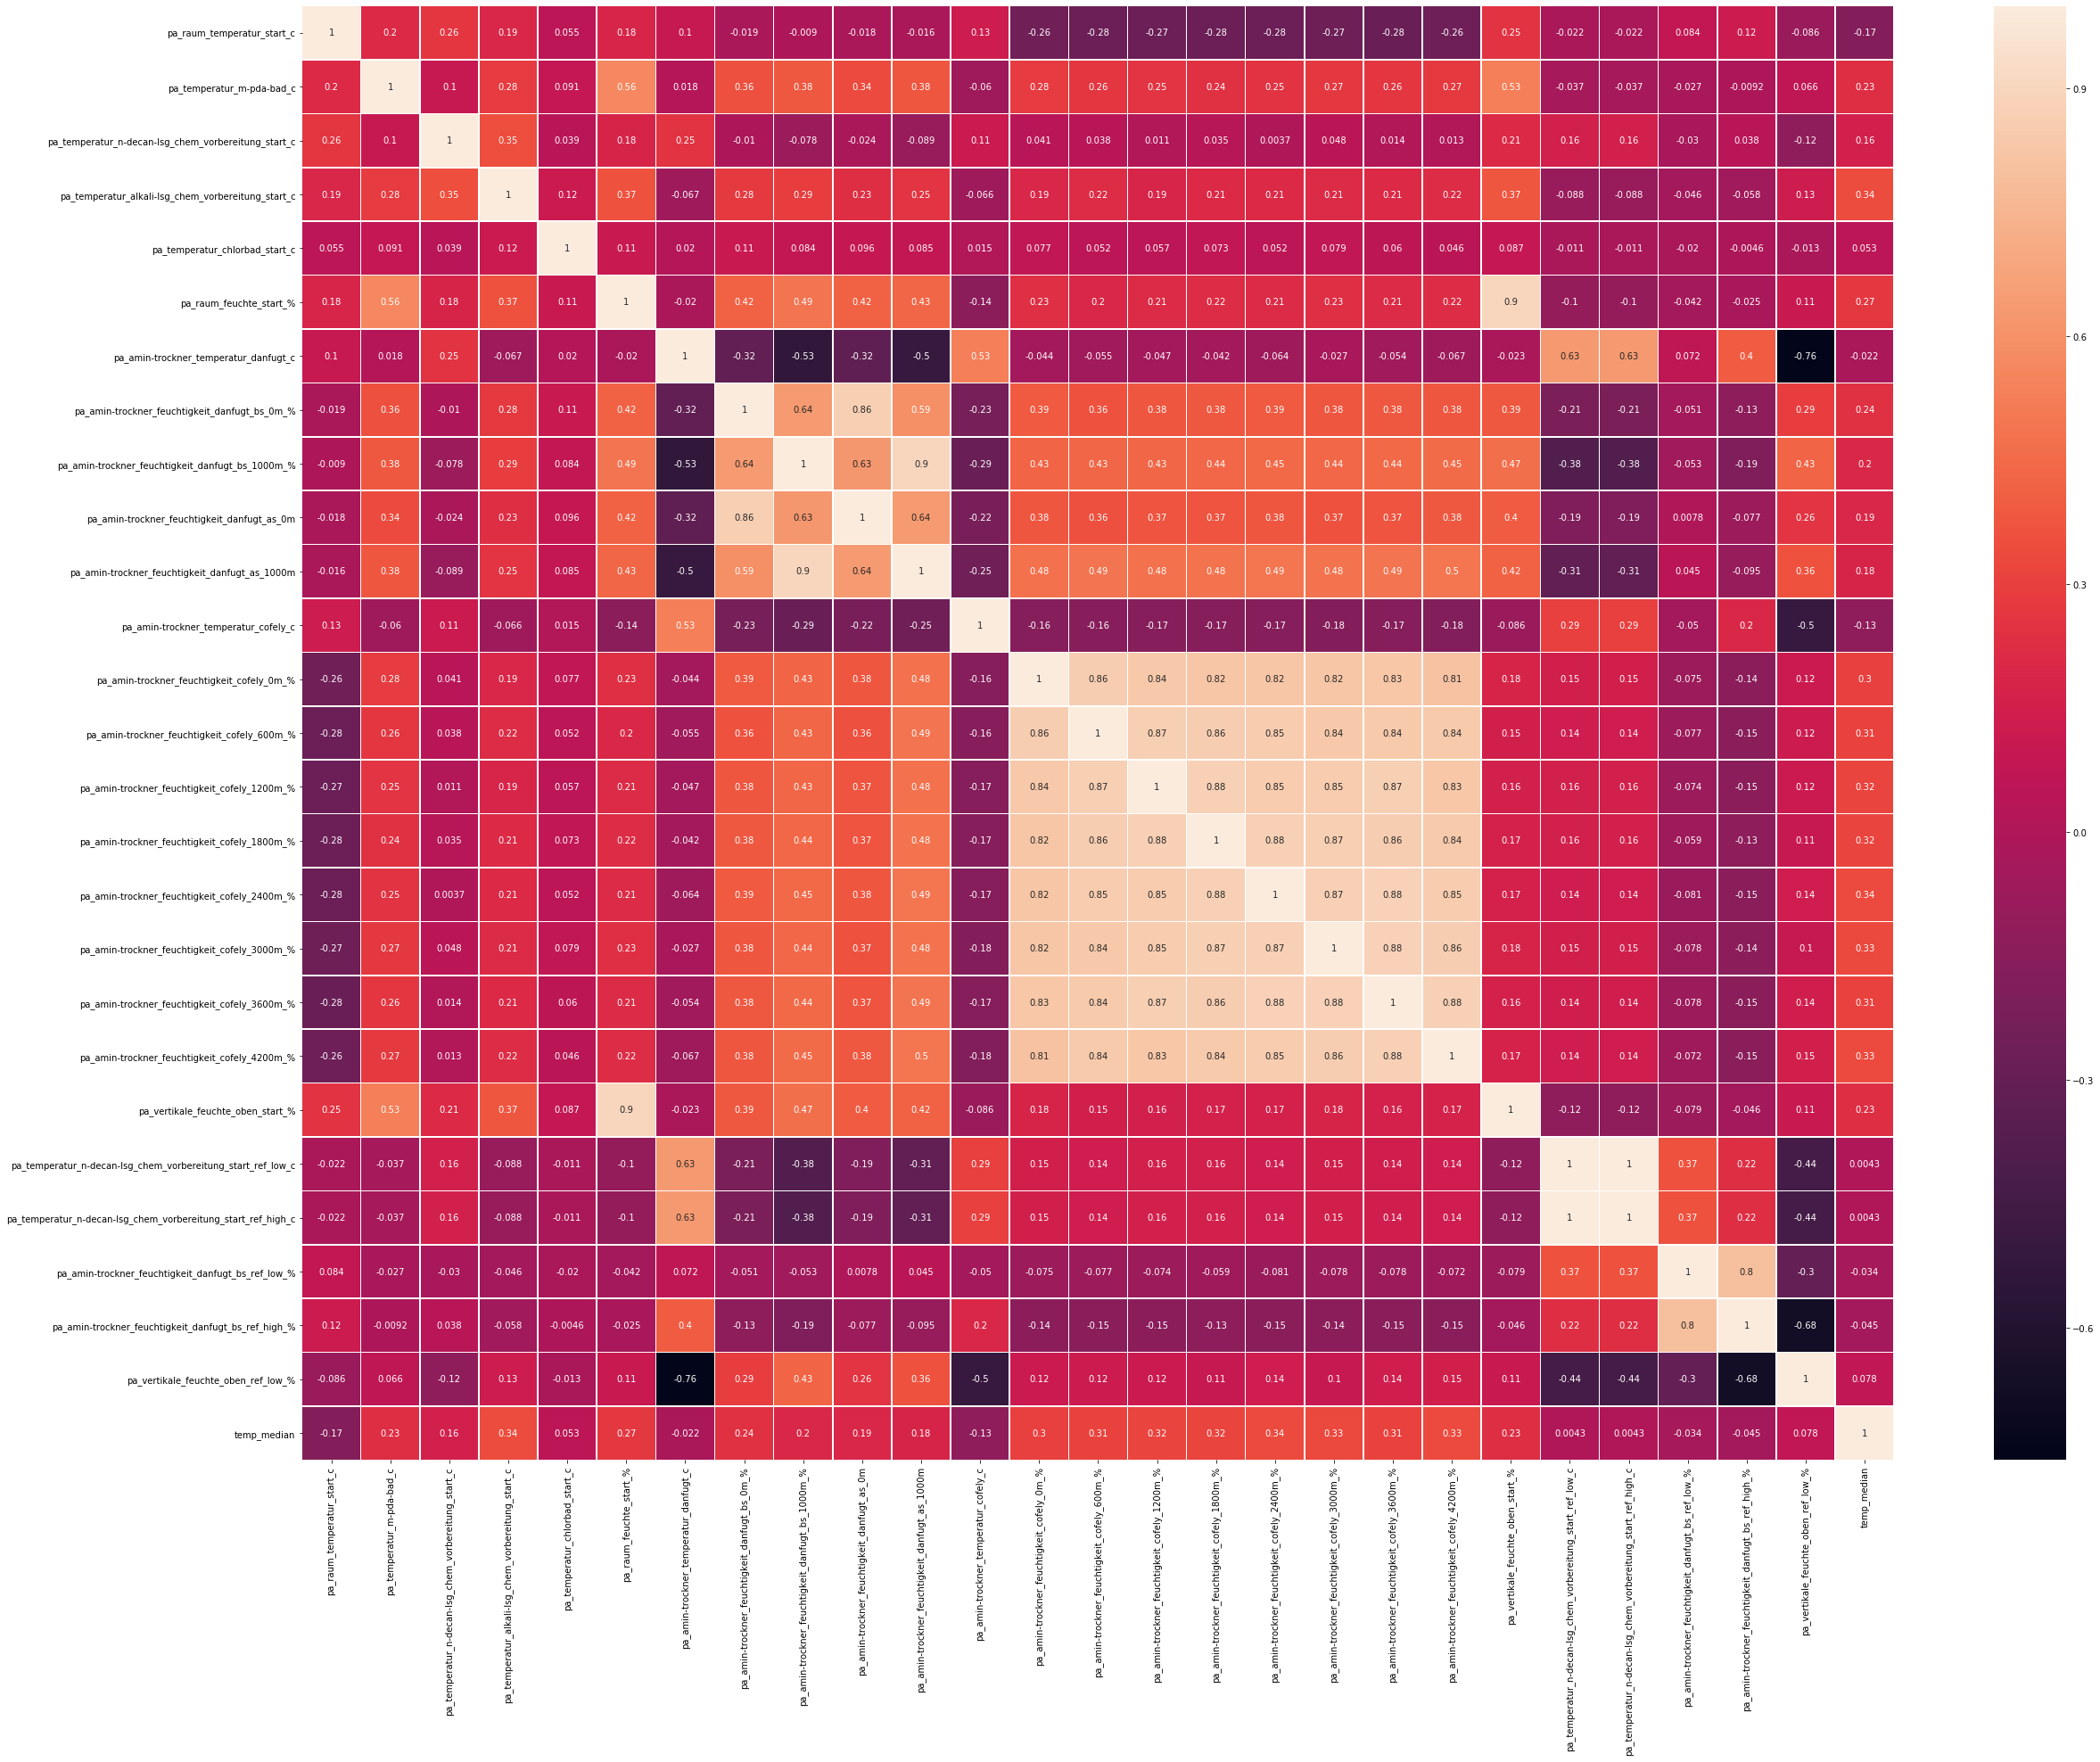

In [89]:
plt.figure(figsize=(40, 30))
p = sns.heatmap(X2.corr(method='spearman'),annot=True,linewidth=.5)
plt.savefig('./Figures/X2_heatmap_spearman.pdf')

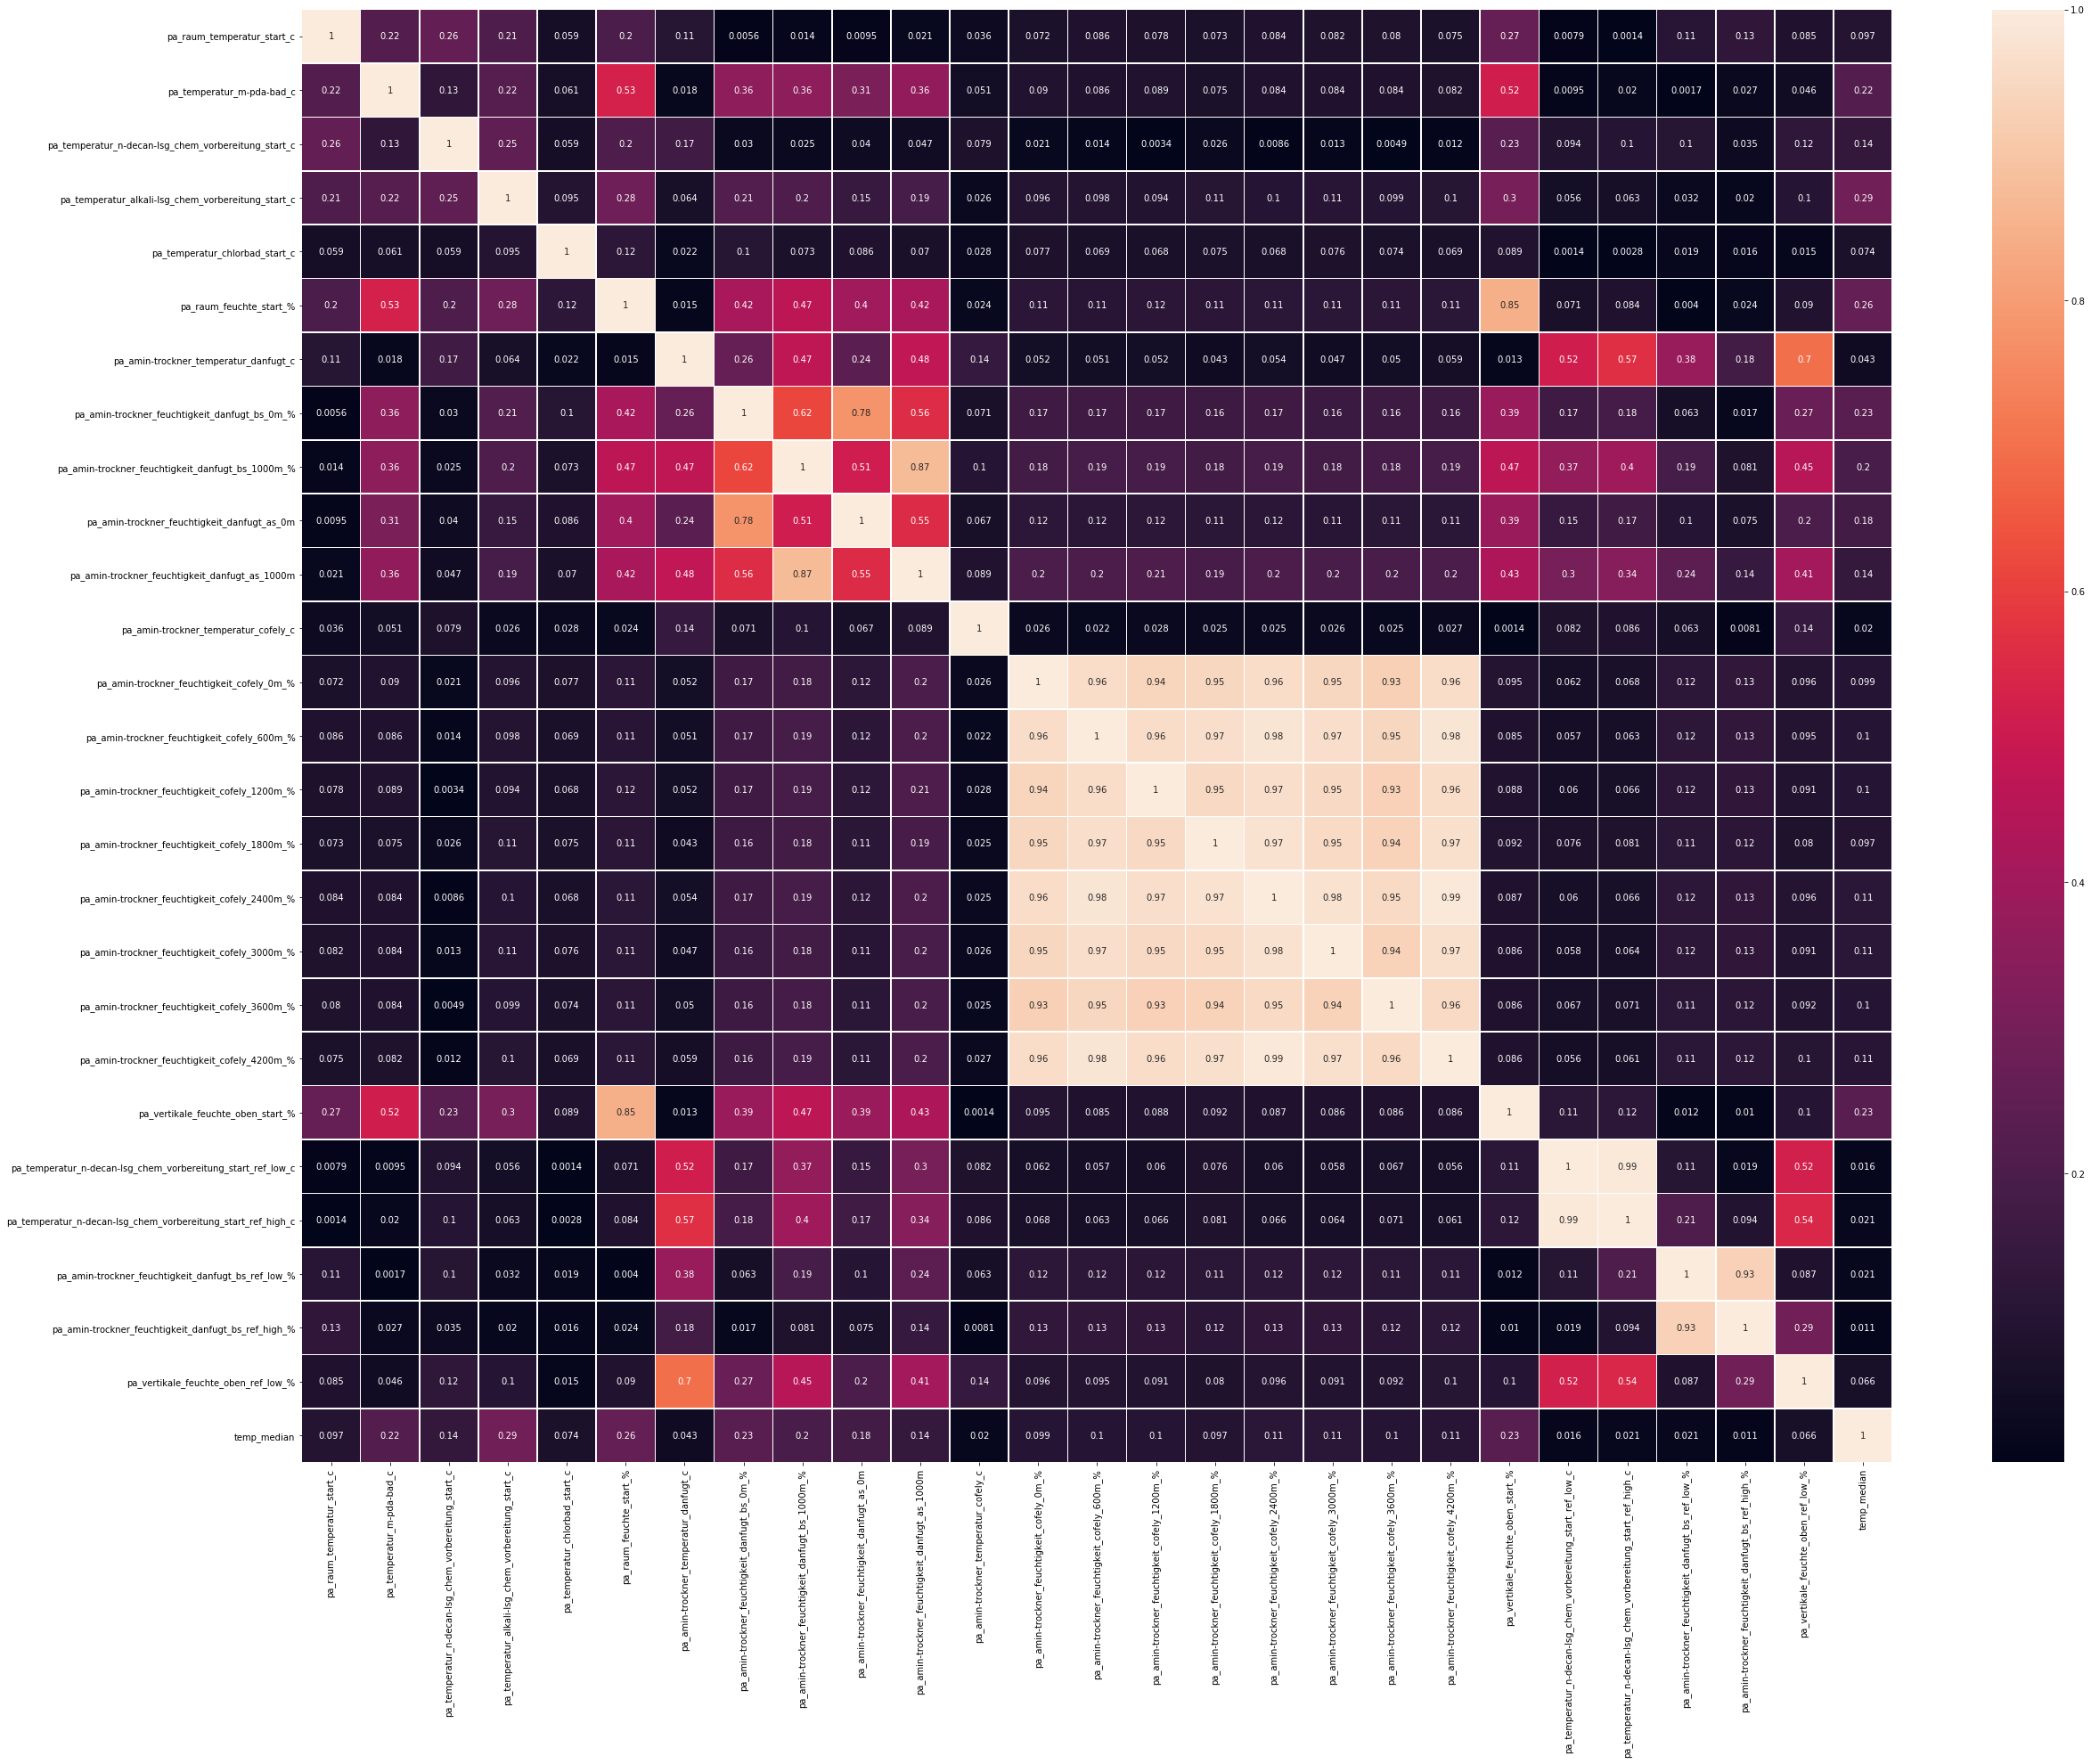

In [91]:
plt.figure(figsize=(40, 30))
p = sns.heatmap(X2.corr(method='pearson').abs(),annot=True,linewidth=.5)
plt.savefig('./Figures/X2_heatmap_abs_pearson.pdf')

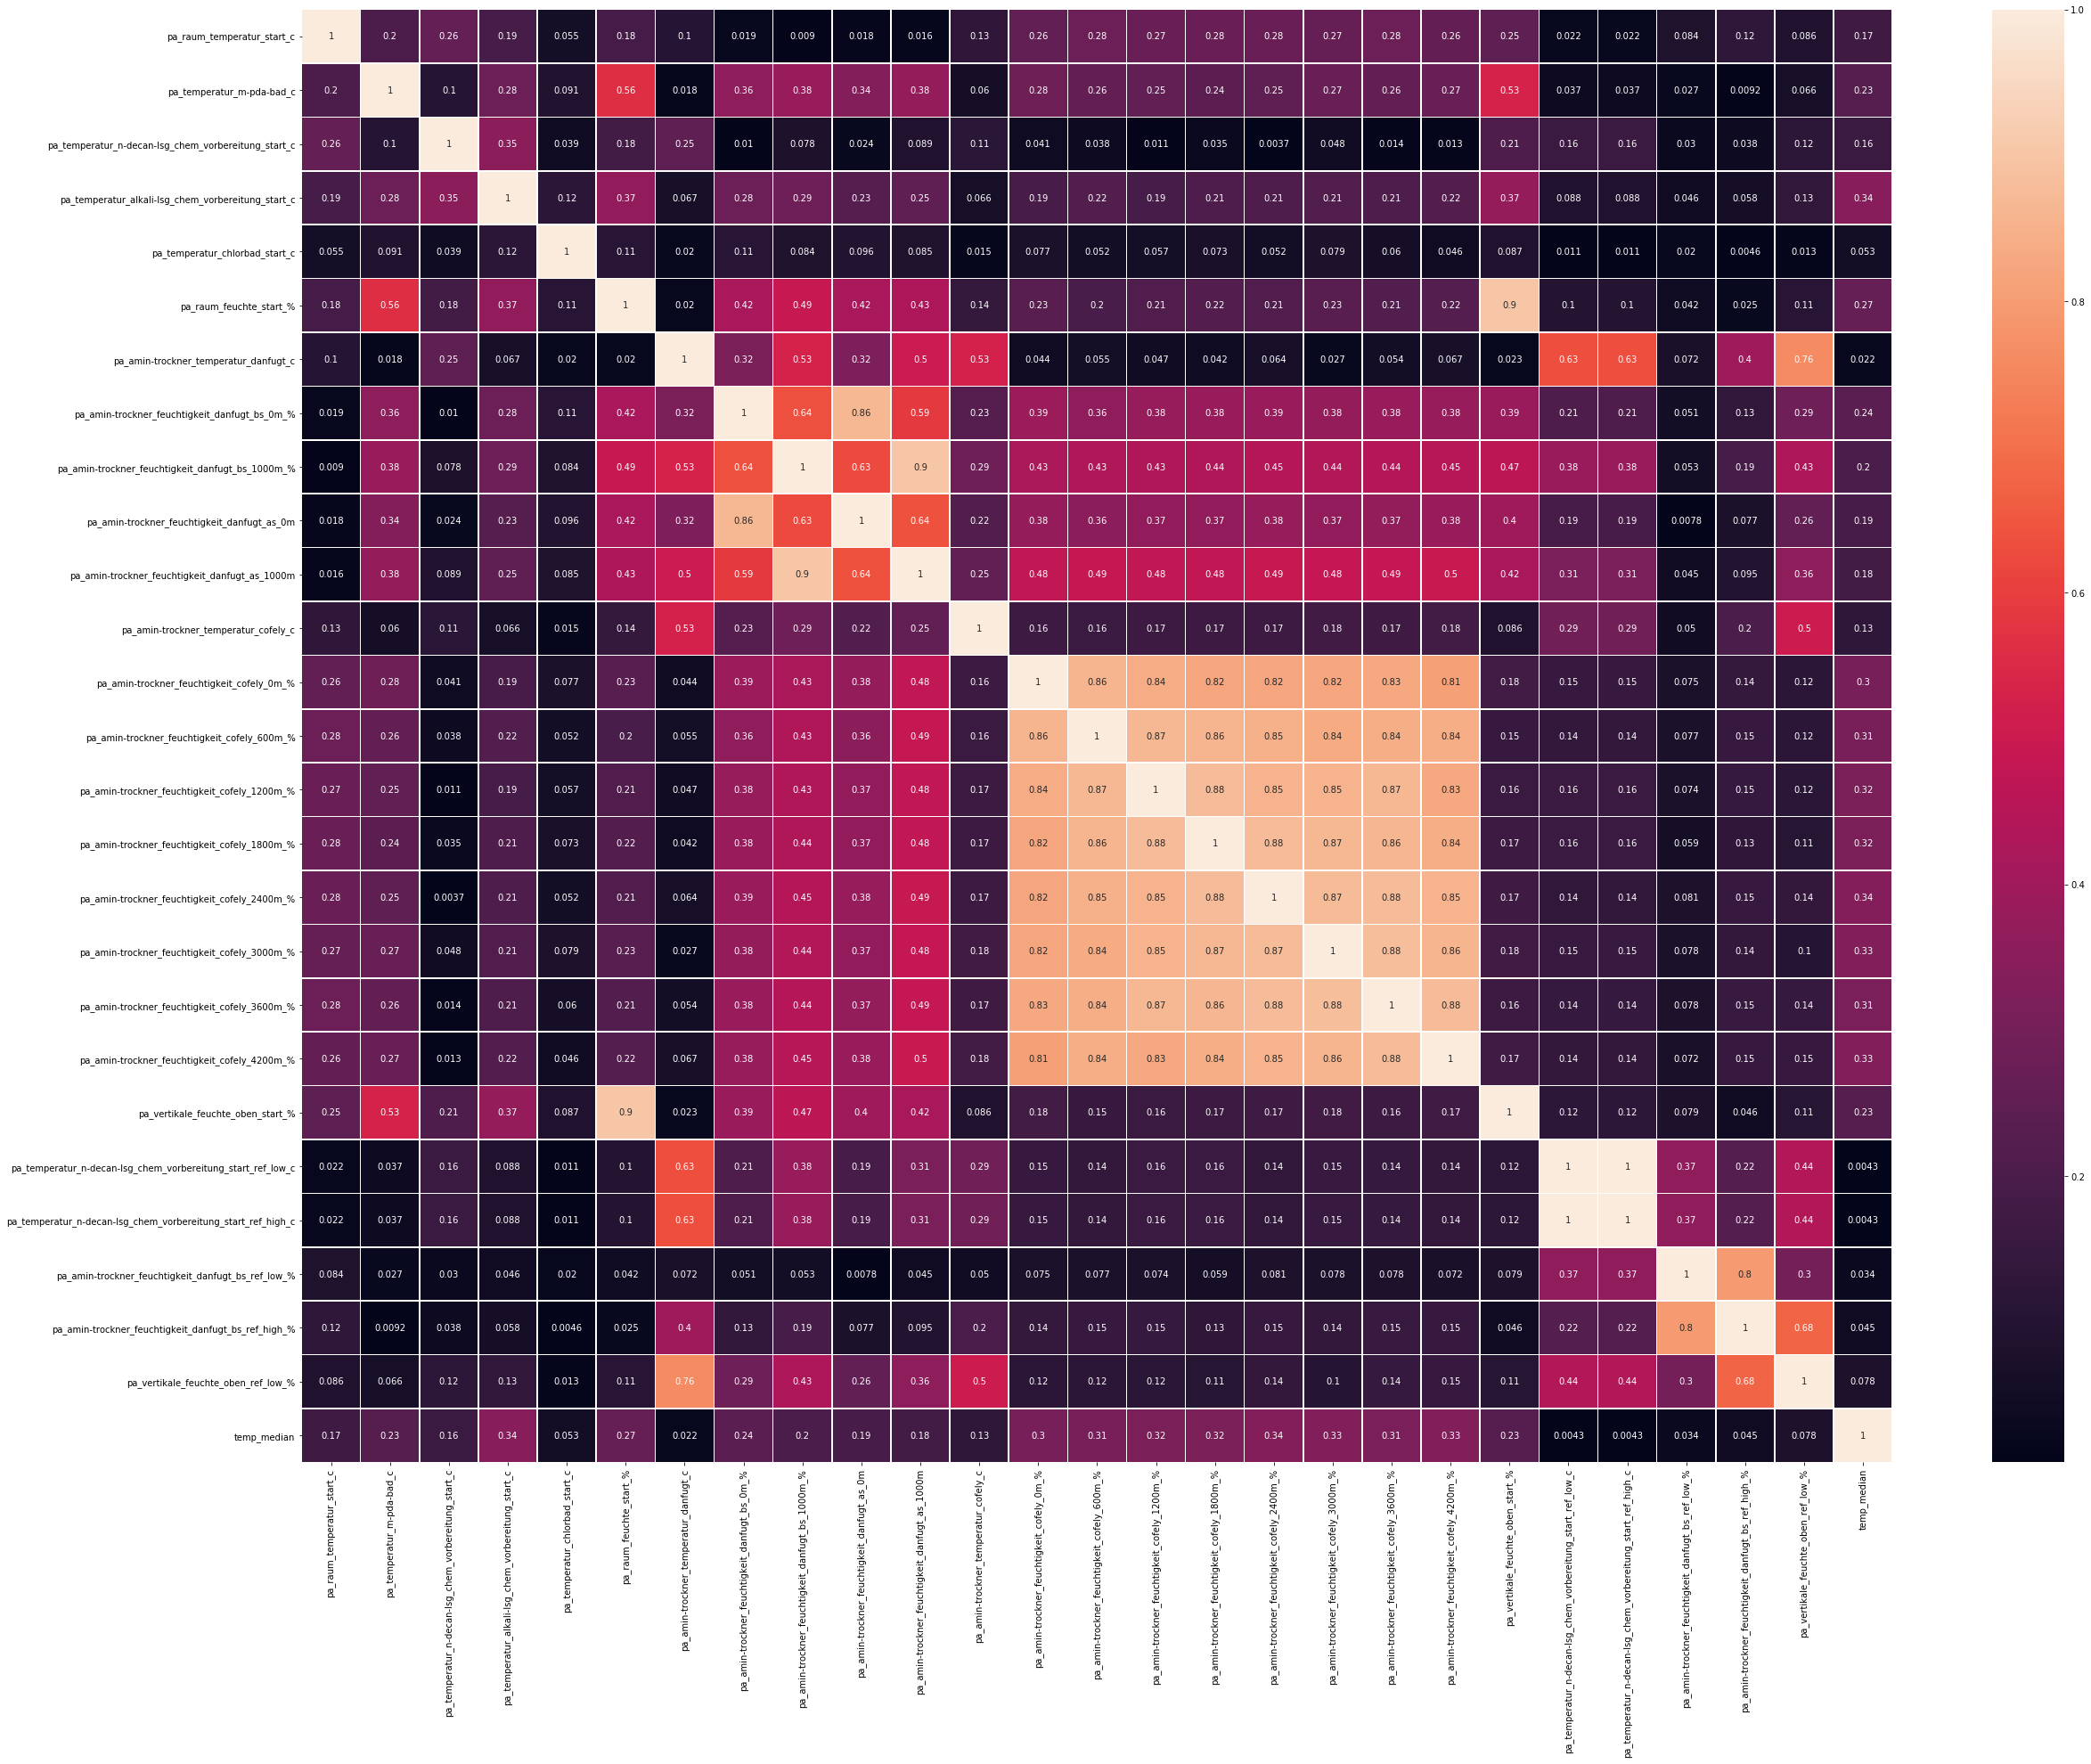

In [90]:
plt.figure(figsize=(40, 30))
p = sns.heatmap(X2.corr(method='spearman').abs(),annot=True,linewidth=.5)
plt.savefig('./Figures/X2_heatmap_abs_spearman.pdf')

In [98]:
X3 = X2.drop(columns=p2_90)

In [99]:
X3.shape

(117559, 19)

In [100]:
X3.columns

Index(['pa_raum_temperatur_start_c', 'pa_temperatur_m-pda-bad_c',
       'pa_temperatur_n-decan-lsg_chem_vorbereitung_start_c',
       'pa_temperatur_alkali-lsg_chem_vorbereitung_start_c',
       'pa_temperatur_chlorbad_start_c', 'pa_raum_feuchte_start_%',
       'pa_amin-trockner_temperatur_danfugt_c',
       'pa_amin-trockner_feuchtigkeit_danfugt_bs_0m_%',
       'pa_amin-trockner_feuchtigkeit_danfugt_bs_1000m_%',
       'pa_amin-trockner_feuchtigkeit_danfugt_as_0m',
       'pa_amin-trockner_feuchtigkeit_danfugt_as_1000m',
       'pa_amin-trockner_temperatur_cofely_c',
       'pa_amin-trockner_feuchtigkeit_cofely_0m_%',
       'pa_vertikale_feuchte_oben_start_%',
       'pa_temperatur_n-decan-lsg_chem_vorbereitung_start_ref_low_c',
       'pa_temperatur_n-decan-lsg_chem_vorbereitung_start_ref_high_c',
       'pa_amin-trockner_feuchtigkeit_danfugt_bs_ref_low_%',
       'pa_vertikale_feuchte_oben_ref_low_%', 'temp_median'],
      dtype='object')

In [102]:
X3.to_pickle("./Variables/X3.pkl")

In [104]:
print(X3.shape)
print(y.shape)

(117559, 19)
(117559, 1)


In [107]:
X3.join(y,how='right')

,pa_raum_temperatur_start_c,pa_temperatur_m-pda-bad_c,pa_temperatur_n-decan-lsg_chem_vorbereitung_start_c,pa_temperatur_alkali-lsg_chem_vorbereitung_start_c,pa_temperatur_chlorbad_start_c,pa_raum_feuchte_start_%,pa_amin-trockner_temperatur_danfugt_c,pa_amin-trockner_feuchtigkeit_danfugt_bs_0m_%,pa_amin-trockner_feuchtigkeit_danfugt_bs_1000m_%,pa_amin-trockner_feuchtigkeit_danfugt_as_0m,pa_amin-trockner_feuchtigkeit_danfugt_as_1000m,pa_amin-trockner_temperatur_cofely_c,pa_amin-trockner_feuchtigkeit_cofely_0m_%,pa_vertikale_feuchte_oben_start_%,pa_temperatur_n-decan-lsg_chem_vorbereitung_start_ref_low_c,pa_temperatur_n-decan-lsg_chem_vorbereitung_start_ref_high_c,pa_amin-trockner_feuchtigkeit_danfugt_bs_ref_low_%,pa_vertikale_feuchte_oben_ref_low_%,temp_median,qc_salzrckhalt
0,24.0,19.0,29.75,23.23,20.0,38.0,30.0,51.0,58.0,50.0,59.0,20.0,79.0,48.0,24.0,28.0,57.0,40.0,22.0,99.455138
1,24.0,19.0,29.75,23.23,20.0,38.0,30.0,51.0,58.0,50.0,59.0,20.0,79.0,48.0,24.0,28.0,57.0,40.0,22.0,99.530406
2,24.0,19.0,29.75,23.23,20.0,38.0,30.0,51.0,58.0,50.0,59.0,20.0,79.0,48.0,24.0,28.0,57.0,40.0,22.0,99.523320
3,24.0,19.0,29.75,23.23,20.0,38.0,30.0,51.0,58.0,50.0,59.0,20.0,79.0,48.0,24.0,28.0,57.0,40.0,22.0,99.567549
4,24.0,19.0,29.75,23.23,20.0,38.0,30.0,51.0,58.0,50.0,59.0,20.0,79.0,48.0,24.0,28.0,57.0,40.0,22.0,99.577392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118682,23.4,20.0,26.70,22.60,21.0,34.0,30.0,59.0,60.0,57.0,57.0,20.0,79.6,45.0,24.0,28.0,57.0,40.0,21.7,99.404884
118683,23.4,20.0,26.70,22.60,21.0,34.0,30.0,59.0,60.0,57.0,57.0,20.0,79.6,45.0,24.0,28.0,57.0,40.0,21.7,99.453192
118684,23.4,20.0,26.70,22.60,21.0,34.0,30.0,59.0,60.0,57.0,57.0,20.0,79.6,45.0,24.0,28.0,57.0,40.0,21.7,99.407655
118685,23.4,20.0,26.70,22.60,21.0,34.0,30.0,59.0,60.0,57.0,57.0,20.0,79.6,45.0,24.0,28.0,57.0,40.0,21.7,99.484820


### Finding a (linear) model

In [141]:
X3.shape

(117559, 19)

In [ ]:
data = (X3.join(y,how='right')
        .select_dtypes(['int64', 'float64'])
        .iloc[:,:]
        .sample(100)
       )

#f = plt.figure(figsize=(100,100))

sns.set()

sns.pairplot(data=data,
             x_vars=X3.columns[0:3],
             y_vars='qc_salzrckhalt',
             diag_kind="kde",
            )

sns.pairplot(data=data,
             x_vars=X3.columns[3:6],
             y_vars='qc_salzrckhalt',
             diag_kind="kde",
            )




#### seaborn

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [180]:
Xy = X3.join(y,how='right')
Xy.dropna(axis=0,how='any',inplace=True)
X4 = Xy.copy()
y4 = X4.pop('qc_salzrckhalt')

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

In [185]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [186]:
coeff_df = pd.DataFrame(regressor.coef_, X4.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
pa_raum_temperatur_start_c,-0.006818
pa_temperatur_m-pda-bad_c,-0.000836
pa_temperatur_n-decan-lsg_chem_vorbereitung_start_c,0.006819
pa_temperatur_alkali-lsg_chem_vorbereitung_start_c,-0.005625
pa_temperatur_chlorbad_start_c,-0.005114
pa_raum_feuchte_start_%,0.002502
pa_amin-trockner_temperatur_danfugt_c,-0.003619
pa_amin-trockner_feuchtigkeit_danfugt_bs_0m_%,-0.000084
pa_amin-trockner_feuchtigkeit_danfugt_bs_1000m_%,-0.003795
pa_amin-trockner_feuchtigkeit_danfugt_as_0m,0.000327


In [188]:
y_pred = regressor.predict(X_test)

In [190]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3 = df2.sample(25)

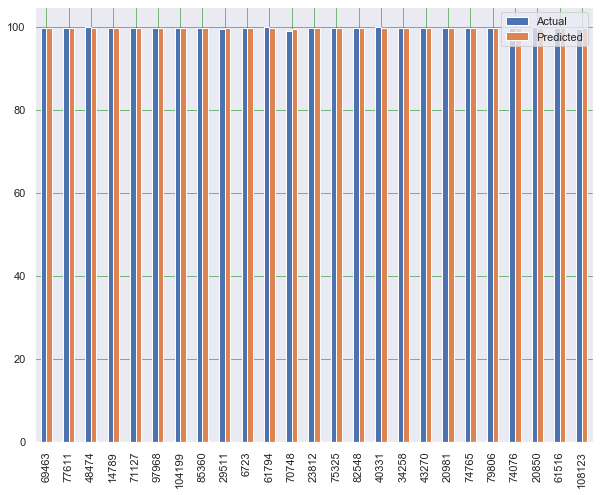

In [202]:
df3.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [203]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.11340856225128298
Mean Squared Error: 1.116569653955466
Root Mean Squared Error: 1.056678595390039


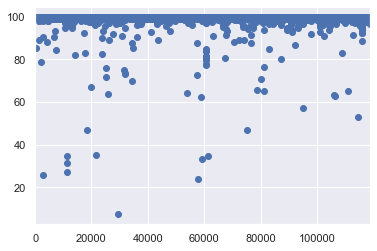

In [207]:
y.plot(style='o')

In [222]:
ii = iter(Xy.columns)

In [267]:
xcol = next(ii)

In [268]:
xcol

'qc_salzrckhalt'

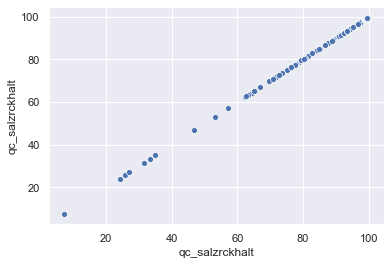

In [269]:
sns.scatterplot(xcol,'qc_salzrckhalt',data=Xy)

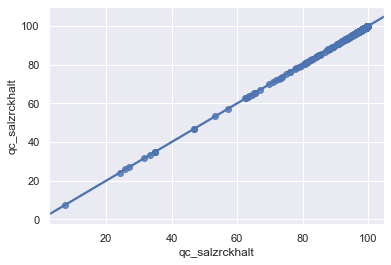

In [270]:
sns.regplot(xcol,'qc_salzrckhalt',data=Xy)